# Repaso Módulo 1 - Optimización.
---

## Primer punto. Optimización de funciones escalares usando `sympy`.

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [276]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

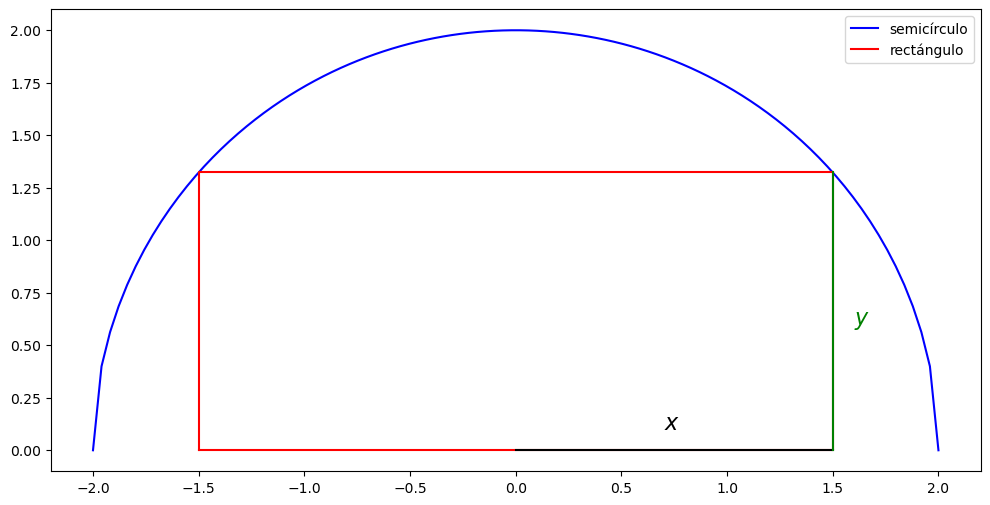

In [277]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1.** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en $\LaTeX$, en celdas Markdown.

En este caso el area del rectángulo sería:
$$ A = 2xy $$

Tomando en cuenta que el radio del círculo es conocidose puede plantear una ecuación de restricción para el rectángulo que incluya el radio $r$, $x$ y $y$. Por ejemplo el teorema de pitágoras:
$$ r^2 = x^2 + y^2 $$

Ahora hay que depejar para una variable, en este caso $y$:
$$ y = \sqrt{r^2 - x^2} = \sqrt{4 - x^2} $$

Con estos datos ahora podemos escribir una función de la variable $x$ de la siguiente manera:
$$A_R (x) = 2x \sqrt{4 - x^2} $$

**Punto 2.** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

In [278]:
import sympy as sp
sp.var("x")
sp.var("y")

pitagoras = sp.solve(x**2 + y**2 - 2**2 , y)[1]

def A(x):
    return 2*x * pitagoras

dA = sp.diff(A(x), x)

pc = sp.solve(dA, x)
pc

[-sqrt(2), sqrt(2)]

Dado que solo hay una solución positiva, ese es el óptimo.

**Punto 3.** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

Por lo tanto, la solución para $x$ es: $\sqrt{2}$

Para $y$ hay que sustituir el valor obtenido de $x$ en pitágoras:

In [279]:
pitagoras.subs(x, pc[1])

sqrt(2)

$$ x = \sqrt{2} $$
$$ y = \sqrt{2} $$

## Segundo punto. Programación lineal.

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

In [280]:
import pandas as pd
import scipy.optimize as opt

df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


Cada trabajador labora cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1.** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

Criterio de optimización:
   - Minimización

Variables sobre las que tengo control:
   - Trabajadores por día: $x_1, x_2, x_3, x_4, x_5, x_6, x_7$

Función de costos:
   - $C_T = x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7$

Restricciones:
   - Cantidad de trabajadores por día, ademas de que cada trabajador tiene que laburar 5 días consecutivos y descansar 2
   $$ 1, 0, 0, 1, 1, 1, 1 \geq 14 $$
   $$ 1, 1, 0, 0, 1, 1, 1 \geq 13 $$
   $$ 1, 1, 1, 0, 0, 1, 1 \geq 15 $$
   $$ 1, 1, 1, 1, 0, 0, 1 \geq 16 $$
   $$ 1, 1, 1, 1, 1, 0, 0 \geq 19 $$
   $$ 0, 1, 1, 1, 1, 1, 0 \geq 18 $$
   $$ 0, 0, 1, 1, 1, 1, 1 \geq 11 $$

Debido a que nuestra restricción está escrita con el símbolo "mayor igual" hay que cambiar el signo multiplicando todo por menos 1

**Punto 2.** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

In [281]:
import scipy.optimize as opt
import numpy as np

c = np.array([1, 1, 1, 1, 1, 1, 1])

Aub = np.array([
    [-1, -0, -0, -1, -1, -1, -1],
    [-1, -1, -0, -0, -1, -1, -1],
    [-1, -1, -1, -0, -0, -1, -1],
    [-1, -1, -1, -1, -0, -0, -1],
    [-1, -1, -1, -1, -1, -0, -0],
    [-0, -1, -1, -1, -1, -1, -0],
    [-0, -0, -1, -1, -1, -1, -1]
])

bub = np.array([-14,
                -13, 
                -15, 
                -16, 
                -19, 
                -18, 
                -11])

sol = opt.linprog(c, Aub, bub)
sol.x

array([4., 3., 5., 4., 3., 3., 0.])

Comprobación de que no se rompe la restricción:

In [282]:
Aub @ sol.x

array([-14., -13., -15., -16., -19., -18., -15.])

Por lo tanto, la siguiente cantidad de trabajadores tiene que entrar por día:
- Lunes: 4
- Martes: 3
- Miércoles: 5
- Jueves: 4
- Viernes: 3
- Sábado: 3
- Domingo: 0

## Tercer punto. Ajuste de curvas.

**Enunciado**. El archivo `Salarios_minimos.csv` contiene datos simplificados de los salarios mínimos desde 1986 a la fecha. La primer columna corresponde a los años, la segunda a dichos salarios. La información completa se encuentra en

https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007.

**Punto 1.** Importar los datos en un DataFrame de pandas.

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

tabla = pd.read_csv("Salarios_minimos.csv")
tabla

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90
5,1991.84,13.33
6,1993.00,14.27
7,1994.00,15.27
8,1995.00,16.34
9,1995.30,18.30


**Punto 2.** Usando los años como variable independiente $x$ y los salarios mínimos como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos del archivo contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

#### Parte 1. Regresión Lineal

In [284]:
start = min(tabla["Periodo"])
x = np.array(tabla["Periodo"]) - start
y = np.array(tabla["Salario"])

def funcion_de_costo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

m = len(y)
ones = np.ones([m, 1])
y_vector = np.reshape(y, [m, 1])

#Lineal = b0 + b1*x
beta = np.random.rand(2)
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

#Cuadrática b0 + b1*x + b2*x**2
beta2 = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack( (ones, x_factor, x2_factor) )
sol2 = opt.minimize(funcion_de_costo, beta2, args=(X2, y_vector))


# Cúbica b0 + b1*x + b2*x**2 + b3**3
beta3 = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )
sol3 = opt.minimize(funcion_de_costo, beta3, args=(X3, y_vector))

In [285]:
sol1

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 276.8872208693217
        x: [ 4.348e+00  2.528e+00]
      nit: 5
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 5.006e-02 -2.538e-03]
            [-2.538e-03  1.823e-04]]
     nfev: 21
     njev: 7

La función lineal es: $y = 4.348 + 2.528x $

In [286]:
sol2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 258.5544374952375
        x: [ 5.720e+00  2.224e+00  1.042e-02]
      nit: 4
      jac: [ 0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[ 1.014e-01 -1.392e-02  3.901e-04]
            [-1.392e-02  2.704e-03 -8.646e-05]
            [ 3.901e-04 -8.646e-05  2.964e-06]]
     nfev: 32
     njev: 8

La función cuadrática es: $y = 5.720 + 2.224x + 0.01042x^2 $

In [287]:
sol3

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 254.0849831807327
        x: [ 5.019e+00  2.549e+00 -1.815e-02  6.518e-04]
      nit: 10
      jac: [-1.907e-06  0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[ 1.566e-01 -3.952e-02  2.644e-03 -5.141e-05]
            [-3.952e-02  1.458e-02 -1.132e-03  2.384e-05]
            [ 2.644e-03 -1.132e-03  9.497e-05 -2.099e-06]
            [-5.141e-05  2.384e-05 -2.099e-06  4.787e-08]]
     nfev: 95
     njev: 19

La función cuadrática es: $y = 5.018 + 2.550x - 0.01821x^2 - 0.0006533x^3 $

#### Parte 2. Graficar polinomios

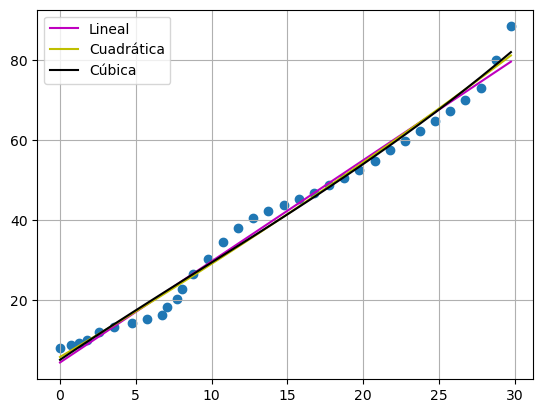

In [288]:
plt.figure()
plt.grid()
plt.scatter(x, salario)
plt.plot(periodo, X1 @ np.reshape(sol1.x, [2, 1]), "m" ,label="Lineal")
plt.plot(periodo, X2 @ np.reshape(sol2.x, [3, 1]), "y", label="Cuadrática")
plt.plot(periodo, X3 @ np.reshape(sol3.x, [4, 1]), "k", label="Cúbica")
plt.legend(loc = "best")

#### Parte 3. Graficar error cuadrático contra número de términos

<BarContainer object of 3 artists>

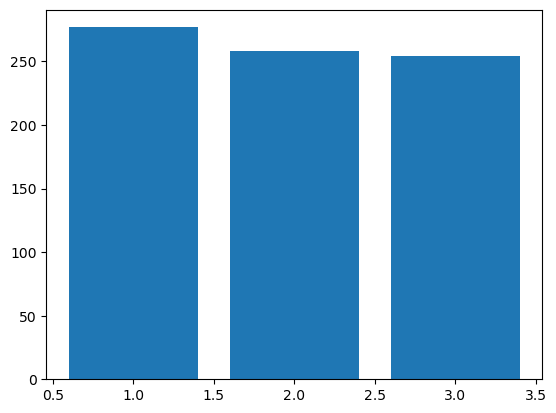

In [289]:
plt.figure()
plt.bar([1, 2, 3], [sol1.fun, sol2.fun, sol3.fun])

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime el salario mínimo en el año 2019 y compare con el dato real 102.68.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

Debido a que en la tabla los periodos comienzan desde el 0 al 33, el año 2019 sería el periodo 34 en la tabla, por lo tanto, remplazar 34 en las funciones:

In [290]:
def f1(x):
    return 4.348 + 2.528*x

def f2(x):
    return 5.720 + 2.224*x + 0.01042*x**2

def f3(x): 
    return 5.018 + 2.550*x - 0.01821*x**2 - 0.0006533*x**3

print("Salario mínimo al 2019, función lineal: ", f1(34))
print("Salario mínimo al 2019, función cuadrática: ", f2(34))
print("Salario mínimo al 2019, función cúbica: ", f2(34))


Salario mínimo al 2019, función lineal:  90.3
Salario mínimo al 2019, función cuadrática:  93.38152000000001
Salario mínimo al 2019, función cúbica:  93.38152000000001


La función que presentó menos error fue la cúbica, por lo tanto se podría decir que es la más óptima, sin embargo, en los resultados de extrapolación, la cuadrática y la cúbica arrojaron el mismo resultado. La predicción fue mas baja de la real, sin embargo, si siguió con el patrón de ir a la alza.